<table style="margin: auto; text-align: center; width: 100%; table-layout: fixed;">
    <tr>
        <td>
            <a href="mailto:umermjd11@gmail.com" target="_blank">
                <img src="https://img.shields.io/badge/Email-umermjd11@gmail.com-informational?style=for-the-badge&logo=gmail&logoColor=white&color=FF5722" alt="Email Shield">
            </a>
        </td>
        <td>
            <a href="https://umermjd11.github.io/" target="_blank">
                <img src="https://img.shields.io/badge/Website-umermjd11.github.com-2F2E41?style=for-the-badge&logo=google-chrome&logoColor=white" alt="Website Shield">
            </a>
        </td>
    </tr>
    <tr>
        <td>
            <a href="https://github.com/umermjd11" target="_blank">
                <img src="https://img.shields.io/badge/GitHub-umermjd11-181717?style=for-the-badge&logo=github&logoColor=white" alt="GitHub Shield">
            </a>
        </td>
        <td>
            <a href="https://kaggle.com/umermjd11" target="_blank">
                <img src="https://img.shields.io/badge/Kaggle-umermjd11-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white" alt="Kaggle Shield">
            </a>
        </td>
    </tr>
    <tr>
        <td>
            <a href="https://linkedin.com/in/umermjd11" target="_blank">
                <img src="https://img.shields.io/badge/LinkedIn-umermjd11-blue?style=for-the-badge&logo=linkedin&logoColor=white" alt="LinkedIn Shield">
            </a>
        </td>
        <td>
            <a href="https://scholar.google.com/citations?user=LrsLEJgAAAAJ&hl=en" target="_blank">
                <img src="https://img.shields.io/badge/Google%20Scholar-LrsLEJgAAAAJ-4285F4?style=for-the-badge&logo=google-scholar&logoColor=white" alt="Google Scholar Shield">
            </a>
        </td>
    </tr>
    <tr>
        <td>
            <a href="https://orcid.org/0000-0002-5908-3889" target="_blank">
                <img src="https://img.shields.io/badge/ORCID-0000_0002_5908_3889-A6CE39?style=for-the-badge&logo=orcid&logoColor=white" alt="ORCID Shield">
            </a>
        </td>
        <td>
            <a href="https://www.researchgate.net/profile/Umer-Majeed" target="_blank">
                <img src="https://img.shields.io/badge/ResearchGate-Umer_Majeed-00CCBB?style=for-the-badge&logo=researchgate&logoColor=white" alt="ResearchGate Shield">
            </a>
        </td>
    </tr>
    <tr>
        <td colspan="2">
            <a href="https://twitter.com/umermjd11" target="_blank">
                <img src="https://img.shields.io/badge/Twitter-umermjd11-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white" alt="Twitter Shield">
            </a>
        </td>
    </tr>
</table>


<a id="1"></a>
<h1 style="background: #FFC07F; border: 0; color: #2F2E41; 
    box-shadow: 4px 4px 8px rgba(0, 0, 0, 0.3); 
    padding: 10px; border-radius: 10px; margin: 15px 0;">
    <center style="color: #2F2E41;">1. Overview</center>
</h1>

<a id="1-1"></a>

## 1.1. Transformer Network


In this analysis, we explore the Transformer architecture, a powerful neural network model that leverages parallel processing to accelerate training while capturing sequential relationships in data. Unlike sequential models such as RNNs, GRUs, and LSTMs, Transformers utilize self-attention mechanisms, enabling more efficient and scalable learning of complex patterns in sequences.

<a id="1-2"></a>

## 1.2. Objectives

Through this study, we aim to:

- Develop positional encodings to represent the order of elements in sequences.
- Compute scaled dot-product self-attention for efficient contextualization of embeddings.
- Implement masked multi-head attention to manage sequence dependencies.
- Construct and train a Transformer model.


<a id="2"></a>
<h1 style="background: #FFC07F; border: 0; color: #2F2E41; 
    box-shadow: 4px 4px 8px rgba(0, 0, 0, 0.3); 
    padding: 10px; border-radius: 10px; margin: 15px 0;">
    <center style="color: #2F2E41;">2. Imports</center>
</h1>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import time
import numpy as np
import matplotlib.pyplot as plt
import unittest

from tensorflow.keras.layers import Embedding, MultiHeadAttention, Dense, Input, Dropout, LayerNormalization
from transformers import DistilBertTokenizerFast #, TFDistilBertModel
from transformers import TFDistilBertForTokenClassification

2024-11-23 20:47:54.720018: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-23 20:47:56.314587: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-23 20:47:56.835657: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732394877.546540    1139 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732394877.743706    1139 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-23 20:47:59.492407: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

<a id="3"></a>
<h1 style="background: #FFC07F; border: 0; color: #2F2E41; 
    box-shadow: 4px 4px 8px rgba(0, 0, 0, 0.3); 
    padding: 10px; border-radius: 10px; margin: 15px 0;">
    <center style="color: #2F2E41;">3. Positional Encoding</center>
</h1>

Unlike RNNs, which process inputs sequentially and inherently capture order information, Transformers process the entire input sequence in parallel. While this parallelism significantly reduces training time, it also removes the natural sense of order.

<a id="3-1"></a>

## 3.1. Objective of Positional Encoding

To address the limitation of the Transformer architecture's lack of inherent sequential processing, positional encodings are introduced to explicitly provide information about the order of input data. These encodings ensure that sequence order is preserved while maintaining the parallelism advantage of Transformers. The inclusion of positional encodings ensures that:

1. The Transformer can understand the relative and absolute positions of tokens in a sequence.
2. The encoded sequence retains both semantic information (from embeddings) and positional information (from encodings).
3. The model captures dependencies between words based on their positions, which is critical for tasks like language modeling and translation.

<a id="3-2"></a>

## 3.2. Process of Positional Encoding

The process involves integrating mathematical patterns of sine and cosine functions with word embeddings to encode positional information. Here's how it works:

### 3.2.1. Mathematical Definition

Positional encodings are computed using two equations:

$$
PE_{(pos, 2i)} = \sin\left(\frac{pos}{{10000}^{\frac{2i}{d}}}\right)
$$
$$
PE_{(pos, 2i+1)} = \cos\left(\frac{pos}{{10000}^{\frac{2i}{d}}}\right)
$$

Where:
- **$d$** is the dimensionality of the encoding and the word embedding.
- **$pos$** is the position index of the token in the sequence.
- **$i$** is an integer index that runs over the half of dimensions of the encoding vector. $i$ represents half the dimension index of the encoding.

This pattern ensures that even and odd dimensions have distinct positional information, with sine and cosine functions respectively.

### 3.2.2. Understanding $pos$, $d$, and $i$

- **$pos$**: In positional encoding, **$pos$** refers to the position of the token in the sequence. **$pos$** is crucial for the model to differentiate between tokens based on their order. **$pos$** starts at 0. For example, in a sequence `["I", "am", "learning", "Transformers"]`, the positions would be:
    - "I" → **$pos = 0$**
    - "am" → **$pos = 1$**
    - "learning" → **$pos = 2$**
    - "Transformers" → **$pos = 3$**
    
   **Why Start from 0?** This is because in most programming languages, indexing typically starts from zero, which is also the case for Transformer models. This zero-indexed convention aligns with standard practices in machine learning.

- **$d$**: **$d$** refers to the total dimensionality of the positional encoding vector. This is the size of the vector that will be added to the token embeddings. For instance, if **$d = 6$**, each positional encoding vector would have 6 dimensions. It has same dimensions as the embedding vector.

- **$i$**: **$i$** controls how the positional information is spread across the dimensions. The term "half the dimension index" means that $i$ iterates over half of the total dimensions ($d$) of encoding. **$i$** determines how the position will be encoded within each dimension of the positional encoding vector. Each value of **$i$** corresponds to two dimensions: one for sine and one for cosine. The idea of "half the dimension index" comes from the fact that the encoding for each dimension alternates between sine (for even indices) and cosine (for odd indices).

#### Example:

###### Case 1: **When $d = 6$ (Even)**

For **$d = 6$**, the indices of the dimensions are $0, 1, 2, 3, 4, 5$, **$i$** will iterate from **0 to 2** because:
- There are 6 dimensions in total, with half for sine and half for cosine functions. The sine function is applied to even indices ($0, 2, 4$), and the cosine function is applied to odd indices ($1, 3, 5$).
- For **$i = 0$**, sine and cosine will be computed for the first two dimensions: **$PE_{(pos, 0)}$** and **$PE_{(pos, 1)}$**.
- For **$i = 1$**, sine and cosine will be computed for the next two dimensions: **$PE_{(pos, 2)}$** and **$PE_{(pos, 3)}$**.
- For **$i = 2$**, sine and cosine will be computed for the next two dimensions: **$PE_{(pos, 4)}$** and **$PE_{(pos, 5)}$**.

###### Case 2: **When $d = 7$ (Odd)**

For **$d = 7$**, the indices of the dimensions are $0, 1, 2, 3, 4, 5, 6$, **$i$** will iterate from **0 to 3** because:
- There are 7 dimensions in total, with half for sine and half for cosine functions. The sine function is applied to even indices ($0, 2, 4, 6$), and the cosine function is applied to odd indices ($1, 3, 5$).
- For **$i = 0$**, sine and cosine will be computed for the first two dimensions: **$PE_{(pos, 0)}$** and **$PE_{(pos, 1)}$**.
- For **$i = 1$**, sine and cosine will be computed for the next two dimensions: **$PE_{(pos, 2)}$** and **$PE_{(pos, 3)}$**.
- For **$i = 2$**, sine and cosine will be computed for the next two dimensions: **$PE_{(pos, 4)}$** and **$PE_{(pos, 5)}$**.
- For **$i = 3$** handles the remaining dimension **$PE_{(pos, 6)}$** (this will typically be a **sine** or cosine depending on the specific design, often treated separately in implementation).

##### General Rule:
- If the total dimensionality **$d$** is even (say, **$d = 6$**), the values of **$i$** will range from 0 to **$d/2 - 1$**.
- **When $d$ is odd**, **$i$** iterates from 0 to **$\lceil d/2 \rceil - 1$** (the ceiling of half the dimensions).

### 3.2.3. Key Features of Sine and Cosine Functions

- **Periodicity**: These functions introduce periodic patterns, which help the model generalize over varying sequence lengths and positions.
- **Range**: The values are bounded between **$-1$** and **$1$**, ensuring that adding positional encodings to word embeddings does not disrupt semantic information.
- **Unique Representation**: The use of sine for even indices and cosine for odd indices ensures unique positional information for each dimension. The sine and cosine functions with different frequency scaling ($10000^{\frac{2i}{d}}$) create unique encoding for each position **$pos$**.

### 3.2.4. Encoding as Input

For a given sequence of tokens, the positional encodings are computed and added to the word embeddings. This combined representation is fed into the Transformer, enriching the input with both semantic and positional information. This enables the model to:
- Recognize the position of each token.
- Compute dependencies between tokens based on their relative positions.

### 3.2.5. Visualization of Encodings

The positional encodings for a sequence can be represented as:

|      k         | <code>       0      </code>|<code>       1      </code>|<code>       2      </code>|<code>       3      </code>| <code> ... </code> |<code>      d - 2     </code>|<code>      d - 1     </code>| 
| ---------------- | :------: | ----------------- | ----------------- | ----------------- | ----- | ----------------- | ----------------- |
| encoding(0) = |[$sin(\theta(0, 0, d))$| $cos(\theta(0, 0, d))$| $sin(\theta(0, 1, d))$| $cos(\theta(0, 1, d))$|... |$sin(\theta(0, d//2, d))$| $cos(\theta(0, d//2, d))$]|
| encoding(1) = | [$sin(\theta(1, 0, d))$| $cos(\theta(1, 0, d))$| $sin(\theta(1, 1, d))$| $cos(\theta(1, 1, d))$|... |$sin(\theta(1, d//2, d))$| $cos(\theta(1, d//2, d))$]|
...
| encoding(pos) = | [$sin(\theta(pos, 0, d))$| $cos(\theta(pos, 0, d))$| $sin(\theta(pos, 1, d))$| $cos(\theta(pos, 1, d))$|... |$sin(\theta(pos, d//2, d))$| $cos(\theta(pos, d//2, d))]$|

### 3.2.6. Inner Term: Angle Calculation

Notice that even though the sine and cosine positional encoding equations take in different arguments (`2i` versus `2i+1`, or even versus odd numbers) the inner terms for both equations are the same: $$\theta(pos, i, d) = \frac{pos}{10000^{\frac{2i}{d}}} \tag{3}$$

Consider the inner term as you calculate the positional encoding for a word in a sequence.<br> 
$PE_{(pos, 0)}= sin\left(\frac{pos}{{10000}^{\frac{0}{d}}}\right)$, since solving `2i = 0` gives `i = 0` <br>
$PE_{(pos, 1)}= cos\left(\frac{pos}{{10000}^{\frac{0}{d}}}\right)$, since solving `2i + 1 = 1` gives `i = 0`


The angle is the same for both! The angles for $PE_{(pos, 2)}$ and $PE_{(pos, 3)}$ are the same as well, since for both, `i = 1`. 

This shared term ensures that the encodings for each token are consistent and represent the relative order of tokens within the sequence.

<a id="3-3"></a>

## 3.3. Why Sine and Cosine?

These periodic functions encode positional information without distorting the semantics of word embeddings. Their values range between **$-1$** and **$1$**, ensuring that when added to word embeddings, the original semantic information is enriched, not overwritten. Furthermore, the use of two distinct functions introduces unique positional features for each dimension, allowing the model to effectively learn positional relationships.

### 3.3.1. Key Features of Sine and Cosine Functions

- **Periodicity**: These functions introduce periodic patterns, which help the model generalize over varying sequence lengths and positions.
- **Range**: The values are bounded between **$-1$** and **$1$**, ensuring that adding positional encodings to word embeddings does not disrupt semantic information.
- **Unique Representation**: The use of sine for even indices and cosine for odd indices ensures unique positional information for each dimension.

### 3.3.2. Smooth Interpolation

The continuous nature of sine and cosine functions allows the model to generalize positional information for sequences of varying lengths.

### 3.3.3. Differentiability

These functions are fully differentiable, making them compatible with gradient-based optimization.

### 3.3.4. Encoding Relative Positions

The periodicity inherently encodes both absolute and relative positional relationships, enabling the model to understand word dependencies within a sequence.

<a id="3-4"></a>

## 3.4. Summary

Positional encoding is a critical component of the Transformer architecture, enabling it to process sequences effectively while maintaining the relationships between tokens. By combining mathematical rigor and practical utility, positional encodings allow Transformers to achieve state-of-the-art performance across various natural language processing tasks.

<a id="3-5"></a>

## 3.5. get_angles() implementation

#### **Objective**
The function `get_angles()` computes the angular values required for sine and cosine positional encodings used in Transformer architectures. The goal is to generate a matrix where each position (row) and encoding dimension (column) contain the appropriate angular values based on their respective indices. These angular values are later passed to sine and cosine functions to create positional encodings.

#### **Function Description**

1. **Inputs:**
   - `pos`: A column vector representing the position indices of tokens in the sequence, e.g., \([[0], [1], [2], \dots, [N-1]]\).
   - `k`: A row vector representing the dimension span indices, e.g., \([[0, 1, 2, \dots, d-1]]\).
   - `d`: An integer denoting the total number of encoding dimensions.

2. **Outputs:**
   - `angles`: A NumPy array of shape \((N, d)\), where \(N\) is the number of positions, and \(d\) is the encoding dimension. Each element corresponds to the angular value calculated using the formula:
     $$
     \text{angles}(pos, k) = \frac{pos}{10000^{\frac{2i}{d}}}
     $$
     where \(i = \lfloor \frac{k}{2} \rfloor\) to alternate sine and cosine dimensions.


#### **Implementation Details**

1. **Extracting \(i\):**
   - \(i\) is calculated as `k // 2`. This maps each dimension index (\(k\)) to the "half-dimension index" (\(i\)).
   - For example:
     - If \(k = [0, 1, 2, 3, 4, 5]\), then \(i = [0, 0, 1, 1, 2, 2]\).

2. **Angle Calculation:**
   - For each position \(pos\) and dimension \(k\), the angle is computed as:
     $$
     \frac{pos}{10000^{\frac{2i}{d}}}
     $$
   - Here, \(pos\) controls the token position, \(d\) is the total encoding size, and \(i\) ensures that dimensions alternate between sine and cosine patterns.

3. **Matrix Generation:**
   - Using vectorized operations, the function computes the angle matrix of shape \((N, d)\), where \(N\) is the number of positions in the input sequence and \(d\) is the encoding dimension.


In [3]:
def get_angles(pos, k, d):
    """
    Get the angles for the positional encoding
    
    Arguments:
        pos -- Column vector containing the positions [[0], [1], ...,[N-1]]
        k --   Row vector containing the dimension span [[0, 1, 2, ..., d-1]]
        d(integer) -- Encoding size
    
    Returns:
        angles -- (pos, d) numpy array 
    """
    # Get i from dimension span k
    i = k // 2  # Calculate the "half-dimension index" using integer division for alternating sine (k=2*i) and cosine (k=2*i+1) 
    
    # Calculate the angles using pos, i, and d
    angles = pos / (np.power(10000, (2 * i) / np.float32(d)))
    
    return angles

In [4]:
from public_tests import *
# Unit Test Class
class TestGetAngles(unittest.TestCase):
    def test_get_angles(self):
        # Validate correctness using provided test utility
        get_angles_test(get_angles)
    
    def test_example_case(self):
        # Example case
        position = 4
        d_model = 8
        pos_m = np.arange(position)[:, np.newaxis]  # Shape (4, 1)
        dims = np.arange(d_model)[np.newaxis, :]  # Shape (1, 8)
        
        # Expected output for manual validation
        expected_angles = pos_m / (10000 ** (2 * (dims // 2) / np.float32(d_model)))
        
        # Actual output
        actual_angles = get_angles(pos_m, dims, d_model)
        
        # Assert the arrays are almost equal (floating-point precision)
        np.testing.assert_almost_equal(actual_angles, expected_angles, decimal=6)

# Running the test cases in Jupyter Notebook
unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestGetAngles))

..
----------------------------------------------------------------------
Ran 2 tests in 0.080s

OK


All tests passed


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

<a id="3-6"></a>

## 3.6. `positional_encoding` Implementation
The `positional_encoding` function implements the sine and cosine positional encoding mechanism for Transformer models. This encoding incorporates positional information into token embeddings, enabling the model to discern the sequence order of inputs.

#### **Objective**
To calculate positional encodings for a specified number of positions and embedding dimensions ($d$), as defined by the equations:

$$
PE_{(pos, 2i)} = \sin\left(\frac{pos}{{10000}^{\frac{2i}{d}}}\right)
$$
$$
PE_{(pos, 2i+1)} = \cos\left(\frac{pos}{{10000}^{\frac{2i}{d}}}\right)
$$

The goal is to precompute a matrix of positional encodings such that even indices use the sine function, and odd indices use the cosine function. This approach ensures that each position and dimension have a unique encoding, enabling the model to capture relative and absolute positional relationships.

#### **Guidelines for the implementaton**

1. **Initialize Angles**:
   - **`pos[:, np.newaxis]`** creates a column vector (shape `(positions, 1)`), making it compatible for broadcasting.
   - **`k[np.newaxis, :]`** creates a row vector (shape `(1, d)`), making it compatible for broadcasting.
   - Calls the `get_angles` function to compute the angles based on position indices (`pos`) and dimension indices (`i`). 
   - **`pos` (column vector)** is broadcasted across each column.
   - **`10000^(2i/d)`** (row vector) is broadcasted across each row.
   - This forms the matrix `angle_rads` of shape `(positions, d)`, where:
$$
\text{angles}_{p, k} = \frac{\text{pos}_p}{10000^{\frac{2i}{d}}}
$$

2. **Apply Sine to Even Indices**:
   - For every second index (`0, 2, 4, ...`), the sine function is applied:
     ```python
     angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
     ```
   - This corresponds to the $PE_{(pos, 2i)}$ formula.

3. **Apply Cosine to Odd Indices**:
   - For every alternate index (`1, 3, 5, ...`), the cosine function is applied:
     ```python
     angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
     ```
   - This corresponds to the $PE_{(pos, 2i+1)}$ formula.

4. **Add an Extra Dimension**:
   - The positional encoding matrix is reshaped to `(1, positions, d)` by adding a batch dimension for compatibility with neural network models:
     ```python
     pos_encoding = angle_rads[np.newaxis, ...]
     ```

5. **Convert to Tensor**:
   - The final matrix is cast to a TensorFlow tensor with a data type of `float32`:
     ```python
     tf.cast(pos_encoding, dtype=tf.float32)
     ```

#### **Flow of the Implementation**
1. Compute angles for positional encodings using `get_angles`.
2. Apply sine and cosine functions to even and odd indices, respectively.
3. Reshape the encoding to include a batch dimension.
4. Return the positional encoding matrix as a TensorFlow tensor.

#### **Result**
The output is a matrix of shape `(1, positions, d)` containing precomputed positional encodings. This matrix can be added to token embeddings to incorporate positional information while maintaining compatibility with Transformer architectures. 

This implementation follows the theoretical framework of positional encoding and adheres to the equations defining the sine and cosine functions for even and odd indices.

In [5]:
def positional_encoding(positions, d):
    """
    Precomputes a matrix with all the positional encodings 
    
    Arguments:
        positions (int) -- Maximum number of positions to be encoded 
        d (int) -- Encoding size 
    
    Returns:
        pos_encoding -- (1, position, d_model) A matrix with the positional encodings
    """
    # START CODE HERE
    # initialize a matrix angle_rads of all the angles  
    angle_rads = get_angles(np.arange(positions)[:, np.newaxis],
                            np.arange(d)[ np.newaxis,:],
                            d)
  
    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    # END CODE HERE
    
    pos_encoding = angle_rads[np.newaxis, ...]
    
    return tf.cast(pos_encoding, dtype=tf.float32)

In [6]:
# UNIT TEST    
positional_encoding_test(positional_encoding, get_angles)

2024-11-23 20:48:15.074079: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


All tests passed


Nice work calculating the positional encodings! Now we can visualize them.

(1, 50, 512)


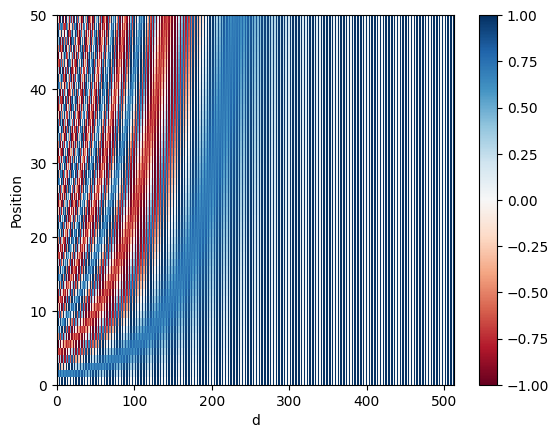

In [7]:
pos_encoding = positional_encoding(50, 512)

print (pos_encoding.shape)

plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('d')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

Each row represents a positional encoding - notice how none of the rows are identical! We have created a unique positional encoding for each of the words.

<a id="4"></a>
<h1 style="background: #FFC07F; border: 0; color: #2F2E41; 
    box-shadow: 4px 4px 8px rgba(0, 0, 0, 0.3); 
    padding: 10px; border-radius: 10px; margin: 15px 0;">
    <center style="color: #2F2E41;">4. Masking</center>
</h1>

Transformer networks rely heavily on the attention mechanism, which computes the relationships between tokens in a sequence. The attention mechanism uses a softmax function to assign weights to each token, determining its relevance. However, input sequences often vary in length, necessitating adjustments to ensure consistency during computation.

When constructing a Transformer network, two types of masks are critical for ensuring the appropriate functionality of the attention mechanism: the **padding mask** and the **look-ahead mask**. These masks ensure that the softmax computation assigns weights correctly, maintaining the integrity of sequence processing.
<a id='4-1'></a>

## 4.1. Padding Mask

In natural language processing, input sequences often vary in length. To process such sequences with a Transformer model, we standardize their lengths. For instance, consider the following example with a maximum sequence length of five:

```text
[
  ["Do", "you", "know", "when", "Jane", "is", "going", "to", "visit", "Africa"], 
  ["Jane", "visits", "Africa", "in", "September"],
  ["Exciting", "!"]
]
```

After tokenization and vectorization, the sequences might appear as follows:

```text
[
  [71, 121, 4, 56, 99, 2344, 345, 1284, 15],
  [56, 1285, 15, 181, 545],
  [87, 600]
]
```

To feed such sequences into a Transformer model, they must be standardized to a uniform length. This can be achieved by padding shorter sequences with zeros and truncating longer sequences to fit the maximum length:

```text
[
  [71, 121, 4, 56, 99],       # Truncated
  [2344, 345, 1284, 15, 0],   # Padded
  [56, 1285, 15, 181, 545],   
  [87, 600, 0, 0, 0]          # Padded
]
```

Here, sequences exceeding the maximum length of five are truncated, and zeros are added to the shorter sequences. The attention mechanism assigns weights to all tokens in a sequence using the softmax function.However, these padding zeros can interfere with the softmax computation by artificially influencing the attention mechanism. Padding zeros, if left unhandled, will affect these weights, causing the model to attend to irrelevant positions.

To mitigate this, we employ a **padding mask**, which is a boolean array specifying which sequence elements should be attended to ($1$) and which should be ignored ($0$). For example, the padding mask for the sequence `[87, 600, 0, 0, 0]` is `[1, 1, 0, 0, 0]`.

- `$1$` indicates meaningful tokens.
- `$0$` denotes padding positions.

To prevent padded elements from influencing the softmax computation, we modify the sequence before applying softmax using the padding mask. Padding positions are assigned a value close to negative infinity ($-10^9$), ensuring that their softmax contribution becomes negligible. The transformed sequence becomes:

```text
[87, 600, -10^9, -10^9, -10^9]
```

When the softmax function processes this transformed sequence, the weights for positions corresponding to $-10^9$ become effectively zero, ensuring the attention mechanism focuses only on meaningful tokens. This adjustment ensures that the softmax function focuses only on meaningful sequence elements and ignores the padding.

In [8]:
def create_padding_mask(decoder_token_ids):
    """
    Creates a padding mask for attention computations.
    
    Arguments:
        decoder_token_ids -- Tensor of shape (n, m) representing input sequences.
    
    Returns:
        mask -- Tensor of shape (n, 1, m) with binary values.
    """    
    # Identify padding tokens (zeros) and create a mask
    seq = 1 - tf.cast(tf.math.equal(decoder_token_ids, 0), tf.float32)
    
    # Add an extra dimension to the mask
    return seq[:, tf.newaxis, :]

In [9]:
x = tf.constant([[7., 6., 0., 0., 1.], [1., 2., 3., 0., 0.], [0., 0., 0., 4., 5.]])
print(create_padding_mask(x))

tf.Tensor(
[[[1. 1. 0. 0. 1.]]

 [[1. 1. 1. 0. 0.]]

 [[0. 0. 0. 1. 1.]]], shape=(3, 1, 5), dtype=float32)


The resulting padding mask identifies the positions of meaningful elements in each sequence.

By multiplying $(1 - \text{mask})$ with $-10^9$ and adding it to the input sequence, we effectively set padding values to negative infinity. Below is the softmax comparison:

- **Original sequence**: Padding influences the computation, leading to incorrect attention weights.
- **Masked sequence**: The padding elements are ignored, ensuring accurate attention.

In [10]:
print(tf.keras.activations.softmax(x))
print(tf.keras.activations.softmax(x + (1 - create_padding_mask(x)) * -1.0e9))

tf.Tensor(
[[7.2876644e-01 2.6809821e-01 6.6454901e-04 6.6454901e-04 1.8064314e-03]
 [8.4437378e-02 2.2952460e-01 6.2391251e-01 3.1062774e-02 3.1062774e-02]
 [4.8541026e-03 4.8541026e-03 4.8541026e-03 2.6502505e-01 7.2041273e-01]], shape=(3, 5), dtype=float32)
tf.Tensor(
[[[7.2973627e-01 2.6845497e-01 0.0000000e+00 0.0000000e+00 1.8088354e-03]
  [2.4472848e-01 6.6524094e-01 0.0000000e+00 0.0000000e+00 9.0030573e-02]
  [6.6483542e-03 6.6483542e-03 0.0000000e+00 0.0000000e+00 9.8670328e-01]]

 [[7.3057157e-01 2.6876226e-01 6.6619506e-04 0.0000000e+00 0.0000000e+00]
  [9.0030573e-02 2.4472848e-01 6.6524094e-01 0.0000000e+00 0.0000000e+00]
  [3.3333331e-01 3.3333331e-01 3.3333331e-01 0.0000000e+00 0.0000000e+00]]

 [[0.0000000e+00 0.0000000e+00 0.0000000e+00 2.6894143e-01 7.3105860e-01]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 4.9999997e-01 4.9999997e-01]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 2.6894143e-01 7.3105860e-01]]], shape=(3, 3, 5), dtype=float32)


Frameworks such as Keras integrate this masking logic seamlessly in layers like `MultiHeadAttention`, ensuring that padding does not distort the model's performance.

<a id='4-2'></a>

## 4.2. Look-ahead Mask

The **look-ahead mask** (also known as the **causal mask**) is an essential component in the Transformer architecture, particularly during training when we want to prevent the model from accessing information it shouldn't use.

<a id='4-2-1'></a>

### 4.2.1. Purpose of the Look-ahead Mask

In a typical autoregressive model, the model predicts the next token based on previous tokens, without "looking ahead" at future tokens. During training, however, we often have access to the entire correct output sequence. The look-ahead mask ensures that the model simulates a real-world prediction scenario by masking future tokens, thereby forcing the model to make predictions based solely on the tokens it has already seen.

In simpler terms, the look-ahead mask prevents the model from cheating by looking at future tokens during training. The goal is for the model to learn to predict each token in the sequence based only on the preceding ones, similar to how it would operate during inference (when generating tokens one by one).

#### Example Scenario

Consider a sequence where the expected correct output is:

```text
[1, 2, 3]
```

When training the model, we want to test if the model can predict the second value i.e. the sequence `[1, 2, -1e9]`, given that it has already predicted the first one i.e. the sequence `[1, -1e9, -1e9]`. To do this, we mask out the second and third values and input the sequence `[1, -10^9, -10^9]`. This means the model can only "see" the first value during its prediction process for the second token. 

Similarly, for predicting the third value, we would mask out the second and third values during the prediction of the third token.



In [11]:
def create_look_ahead_mask(sequence_length):
    """
    Constructs a lower triangular mask matrix for sequence modeling.
    
    This mask is typically used in transformer-based architectures to prevent a 
    position in a sequence from attending to subsequent positions, thereby enforcing 
    an autoregressive property.

    Parameters:
        sequence_length (int): The size of the square mask matrix.

    Returns:
        tf.Tensor: A tensor of shape (1, sequence_length, sequence_length) 
        containing the look-ahead mask, where positions in the upper triangle 
        (future positions) are zeroed out.
    """
    # tf.linalg.band_part(input, -1, 0) ==> Lower triangular part including the main diagonal.
    mask = tf.linalg.band_part(tf.ones((1, sequence_length, sequence_length)), -1, 0)
    return mask


In [12]:
x = tf.random.uniform((1, 3))
temp = create_look_ahead_mask(x.shape[1])
temp

<tf.Tensor: shape=(1, 3, 3), dtype=float32, numpy=
array([[[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]]], dtype=float32)>

<a id="5"></a>
<h1 style="background: #FFC07F; border: 0; color: #2F2E41; 
    box-shadow: 4px 4px 8px rgba(0, 0, 0, 0.3); 
    padding: 10px; border-radius: 10px; margin: 15px 0;">
    <center style="color: #2F2E41;">5. Self-Attention</center>
</h1>

The **self-attention mechanism**, introduced in the paper *"Attention is All You Need"*, is central to Transformer models. It allows them to process sequences of tokens efficiently and focus on the most relevant parts of the input for a given task. This detailed breakdown explores the theoretical foundation, step-by-step implementation, and its critical role in modern machine learning.

<a id='5-1'></a>

## 5.1. Purpose and Objective 

Self-attention dynamically determines the importance of each token in a sequence relative to others. Its main goals are:  
1. **Contextual Understanding**: It captures relationships between tokens in a sequence, irrespective of their distance from each other. This is especially valuable for long-range dependencies, where traditional models like RNNs struggle.  
2. **Parallel Processing**: Unlike RNNs, which process sequences one token at a time, self-attention enables simultaneous computation for all tokens, leading to significant speed-ups.  
3. **Scalability**: By leveraging parallelization, self-attention scales well to longer sequences and larger datasets.

For example, in a sentence like *"The cat sat on the mat"*, self-attention enables the model to focus on the relationship between "cat" and "sat" to infer meaning, while also understanding how "mat" relates to the overall sentence structure.

<a id='5-2'></a>

## 5.2. Mathematical Formulation

The **scaled dot product attention** mechanism is at the core of self-attention.

<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/umermjd11/DLC5M4A1/master/images/self-attention.png" alt="Encoder">
  <br>
  <caption>
    <font color="#00796b" style="font-size: 1.2em; font-weight: bold;">
      <b>Figure 1</b>: Visualization of Self-Attention Calculation
    </font>
  </caption>
</div>

This mechanism takes in a query, key, value, and an optional mask as inputs, and computes rich, attention-based vector representations for the words in a sequence. and is mathematically represented as:  
$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}} + M \right)V
$$ 

Where:  
- **$Q$ (Query)**: Embedding of the current token asking for information.  
- **$K$ (Key)**: Embeddings of all tokens, used to determine relevance to the query.  
- **$V$ (Value)**: Actual content or information associated with each token.  
- **$M$ (Mask)**: Optional mask to exclude irrelevant positions (e.g., padding or future tokens).  
- **$d_k$**: Dimensionality of the key vectors, used for scaling.




<a id='5-3'></a>

## 5.3. **Deep Dive into Self-Attention: Understanding Q, K, V, M, and $d_k$**

In the self-attention mechanism of transformers, several key components play crucial roles in determining how each word (or token) in a sequence attends to other words. The components include the **Query (Q)**, **Key (K)**, **Value (V)** vectors, **Masking (M)**, and the **dimension of the keys and queries ($d_k$)**. Understanding these concepts individually and together is essential for grasping how transformers process sequences.

Let’s break each down with examples, visualizations, and intuitive explanations:

<a id='5-3-1'></a>

### 5.3.1. **Query Matrix** ($Q$)

The **query matrix ($Q$)** in self-attention represents a collection of **query vectors**, each associated with a token in the input sequence. A **query** is essentially the **embedding of the current token**, formulated to ask, **"What information is relevant to me from the rest of the sequence?"**

#### 5.3.1.1. **Role Q (Query)**

The **Query (Q)** vector represents the information that a specific token (word) is "asking about" the other tokens in the sequence. It is a query for relevance or "attention" to the other words based on their context.

#### 5.3.1.2. **Purpose of Q:**
- The primary function of the query is to **interact** with the **key (K)** vectors of all the words in the sequence, helping the model **determine the attention** it should give to each word.
- The query seeks to find out how much attention each word in the sequence deserves in relation to the current token, which is represented by the query.
- Once the relevance scores (attention weights) are calculated, these weights are used to perform a **weighted sum** of the **value (V)** vectors, which ultimately forms the output for the given token.

In simple terms, the query determines how much a word should "pay attention" to the others based on their relevance.

#### 5.3.1.3. **Example:**

Let’s consider a simple sentence:

**"The cat sat on the mat."**

We’ll focus on the word **"cat"** and examine how the query works:

- The **Query for the word "cat"** is created from the word's embedding and transformed by a learned weight matrix $W_Q$.
- The query vector will be compared to the key vectors of all the other words (including itself) to calculate the attention scores.
- Based on the attention scores, the word "cat" will then attend more to certain words that are contextually relevant (e.g., "sat", "mat") and less to others (e.g., "the").

#### 5.3.1.4. **Intuition Behind Q**

To gain intuition about **Q**, let’s consider the following:

##### **Query as a Request for Information:**
- Imagine you're trying to answer a question, and the words in the sentence are the potential sources of information.
- The word **"cat"** is **asking a question**: "What information do I need from the rest of the words in the sentence?" This question is represented by the query vector **Q**.
- The query is **not static**: it depends on the context (the word itself), and how much attention the word gives to others is determined by its query vector interacting with the key vectors of the other words.

##### **Query-Weighting Interaction:**
- The query interacts with the **key vectors** of the other words using a similarity measure (usually the dot product). The result of this interaction gives a score, which tells us **how relevant the other word is to the current word**.
- For example, the word **"cat"** might give higher attention to the word **"sat"** (since they’re related) and less attention to the word **"on"** (which is less semantically relevant).

#### 5.3.1.5. **Mathematics of Query (Q)**

Let’s delve into the mathematics to understand how the query vector works:

##### **1. Embedding of Words**:
Each word in the sequence is initially represented by an embedding vector, say **$X_{\text{cat}}$** for the word "cat". This embedding is typically of high dimensionality (e.g., 512 or 1024), and it represents the token's position in the high-dimensional vector space of the model.

##### **2. Query Vector Calculation**:
The embedding for each word is transformed into the query vector by multiplying it with a learned weight matrix **$W_Q$**. For the word **"cat"**, the query vector **$Q_{\text{cat}}$** is given by:

$$
Q_{\text{cat}} = X_{\text{cat}} \cdot W_Q
$$

Where:
- **$X_{\text{cat}}$** is the embedding vector for "cat".
- **$W_Q$** is the weight matrix for the query transformation, learned during training.

##### **3. Attention Score Calculation**:
Once the query vector **$Q_{\text{cat}}$** is obtained, it is compared with the **key vectors (K)** of all the words in the sequence using a similarity measure (typically the dot product):

$$
\text{Attention Score}_{\text{cat}, i} = Q_{\text{cat}} \cdot K_i
$$

Where:
- **$Q_{\text{cat}}$** is the query vector for "cat".
- **$K_i$** is the key vector for the $i$-th word in the sequence.
- **$\cdot$** denotes the dot product, which measures the similarity between the query and key vectors.

This dot product will yield a scalar value representing the similarity between the current word ("cat") and each of the other words in the sequence.

##### **4. Softmax and Normalization**:
The attention scores are passed through a **softmax function** to normalize them into a probability distribution (i.e., the attention weights). This makes sure the attention scores sum to 1.

$$
\text{Attention Weight}_{\text{cat}, i} = \frac{\exp(\text{Attention Score}_{\text{cat}, i})}{\sum_j \exp(\text{Attention Score}_{\text{cat}, j})}
$$

This step ensures that each attention weight represents the importance of the corresponding word relative to the word "cat".


#### 5.3.1.6. **Example Calculation with Attention Weights**

Let’s assume the embeddings are simple and the transformation matrices are also small for the sake of clarity:

- Embedding for **"cat"**: $X_{\text{cat}} = [0.2, 0.7]$
- Weights for queries: $W_Q = \begin{bmatrix} 0.5 & 0.2 \\ 0.1 & 0.4 \end{bmatrix}$

##### Query Vector for "cat":
$$
Q_{\text{cat}} = X_{\text{cat}} \cdot W_Q = \begin{bmatrix} 0.2 & 0.7 \end{bmatrix} \cdot \begin{bmatrix} 0.5 & 0.2 \\ 0.1 & 0.4 \end{bmatrix} = [0.23, 0.38]
$$

Now let’s assume the key vectors for "sat" and "on" are:

- $K_{\text{sat}} = [0.5, 0.3]$
- $K_{\text{on}} = [0.6, 0.1]$

##### Attention Scores (Dot Product):
- Attention score for "cat" and "sat":
$$
\text{Attention Score}_{\text{cat}, \text{sat}} = Q_{\text{cat}} \cdot K_{\text{sat}} = [0.23, 0.38] \cdot [0.5, 0.3] = (0.23 \times 0.5) + (0.38 \times 0.3) = 0.115 + 0.114 = 0.229
$$

- Attention score for "cat" and "on":
$$
\text{Attention Score}_{\text{cat}, \text{on}} = Q_{\text{cat}} \cdot K_{\text{on}} = [0.23, 0.38] \cdot [0.6, 0.1] = (0.23 \times 0.6) + (0.38 \times 0.1) = 0.138 + 0.038 = 0.176
$$

##### Softmax (Normalization of Attention Scores):
Let’s compute the attention weights using softmax:

$$
\text{Softmax}([0.229, 0.176]) = \frac{\exp(0.229)}{\exp(0.229) + \exp(0.176)} \approx [0.552, 0.448]
$$

These values indicate that "cat" will pay about **55.2%** attention to "sat" and **44.8%** attention to "on".

#### 5.3.1.7. **Intuition Summary**

- **Q** represents a **query** for the relevant context that the current token ("cat") is seeking from other tokens in the sequence.
- It works by interacting with the **key vectors (K)** to calculate **attention scores** (using similarity measures such as dot product).
- The attention scores are then normalized using **softmax** to create **attention weights**.
- The weighted sum of the **value vectors (V)** corresponding to these weights produces the output, allowing the model to attend to the most relevant words in the sequence.

Thus, **Q** enables each word in a sequence to dynamically adjust how much attention it pays to other words based on the context, and it is a key part of the self-attention mechanism.


<a id='5-3-2'></a>

### 5.3.2. **Key Matrix** ($K$)

In the **self-attention** mechanism, the **Key Matrix (K)** and the **key vectors** play a crucial role in helping the model determine how much attention each word (token) should pay to other words in the sequence. 

In the **self-attention** mechanism, the **Key (K)** is a learned transformation of the **embedding** of a word (token). It serves as the reference point for each word that will be used to calculate how relevant it is to a given query (Q).

- The key vectors are used to **measure similarity** with the **query vector (Q)**. The dot product between the query and key vectors is the fundamental operation in calculating the attention scores, which represent the relevance between the query and the key.

Let’s break down the **role**, **purpose**, **example**, **intuition**, **mathematics**, and provide a **mathematical example** for better understanding.

#### 5.3.2.1. **Role of K (Key Matrix)**

The **Key Matrix (K)** is the collection of key vectors for each word in the sequence. It is used to calculate how much attention each word should give to every other word based on their relationships.

- **Defines how "important" a word is in relation to the query**: When a query vector interacts with a key vector, it determines how relevant one word is to another. The greater the similarity between the query and key vectors, the more attention the word should give to the other word.
- **Facilitates attention score calculation**: The dot product between a **query vector (Q)** and a **key vector (K)** computes a score that determines how much attention should be given to the key's corresponding value vector (V).

#### 5.3.2.2. **Purpose of Key (K)**

- **Similarity measurement**: The key vector helps measure the similarity between different words in the sequence, enabling the model to calculate attention scores.
- **Contextualization**: By comparing the query with the key, the model can determine which words are more important to attend to for context. This helps the model focus on the most relevant tokens and ignore irrelevant ones.

#### 5.3.2.3. **Example of Key (K) and Keys in Action**

Let’s take a simple sentence:  
**"The cat sat on the mat."**

We’ll focus on the word **"cat"** and explore how the **key** works:

- The **Key for the word "cat"** is derived from the word’s embedding and transformed by a learned weight matrix **$W_K$**. So, **$K_{\text{cat}}$** represents the key for the word "cat".
- The key vector is compared with the **Query vectors** of all words in the sequence to calculate **attention scores**.

In this example, the word **"cat"** might give higher attention to the words **"sat"** and **"mat"**, and less attention to **"the"**. The keys for these words will be compared to the query vector of "cat" to calculate these attention weights.

#### 5.3.2.4. **Intuition Behind Keys**

To understand the intuition behind **key vectors (K)**, let’s think of **K** as **contextual information**.

##### **Keys as Contextual Representations:**
- Imagine a scenario where **"cat"** wants to understand the context of the sentence. Each word in the sequence has a corresponding **key vector**, which represents its importance in relation to other words.
- The **key vector** serves as a **reference point** for comparison, while the **query vector** (Q) determines how relevant that key is to the current word (in this case, "cat").
- The greater the similarity between a query and a key, the more relevant the associated word’s value vector will be for updating the current word's representation.

##### **Key and Query Interaction:**
- The **key vector** provides the "reference" to the query, and the **query vector** asks how relevant a particular word (represented by its key) is to the word generating the query.
- A key with a high similarity to a query indicates that the corresponding word provides valuable contextual information.

#### 5.3.2.5. **Mathematics of Key (K)**

##### **1. Embedding of Words**:
Each word in the sentence has an initial embedding. For example, let the word **"cat"** have an embedding **$X_{\text{cat}}$**. The embedding vector is then transformed into a key vector by multiplying it by a learned weight matrix **$W_K$**.

For the word "cat":
$$
K_{\text{cat}} = X_{\text{cat}} \cdot W_K
$$
Where:
- **$X_{\text{cat}}$** is the embedding vector of the word "cat".
- **$W_K$** is the weight matrix that transforms the embedding into a key vector.

##### **2. Attention Score Calculation**:
Once the key vectors are created for each word, the attention score is computed by calculating the **dot product** between the query vector and the key vectors. This dot product measures how similar the query is to each key.

The attention score between a query **$Q_{\text{cat}}$** and a key **$K_{\text{sat}}$** would be:

$$
\text{Attention Score}_{\text{cat}, \text{sat}} = Q_{\text{cat}} \cdot K_{\text{sat}}
$$

Where:
- **$Q_{\text{cat}}$** is the query vector for the word "cat".
- **$K_{\text{sat}}$** is the key vector for the word "sat".
- **$\cdot$** denotes the dot product between the query and the key.

##### **3. Softmax and Normalization**:
After calculating the attention scores, they are passed through a **softmax** function to normalize the scores into attention weights.

$$
\text{Attention Weight}_{\text{cat}, i} = \frac{\exp(\text{Attention Score}_{\text{cat}, i})}{\sum_j \exp(\text{Attention Score}_{\text{cat}, j})}
$$

Where:
- **$i$** and **$j$** represent different words in the sequence.
- The denominator ensures that the attention weights sum to 1.

These attention weights tell us how much focus each word should have based on its key similarity to the query.

#### 5.3.2.6. **Mathematical Example**

Let’s continue with the example sentence **"The cat sat on the mat"**:

- Suppose the embeddings for the words are simplified to 2D vectors:
  - **$X_{\text{cat}} = [0.2, 0.7]$**
  - **$X_{\text{sat}} = [0.5, 0.3]$**
  - **$X_{\text{on}} = [0.6, 0.1]$**

Let’s assume the weight matrix for the keys **$W_K$** is:

$$
W_K = \begin{bmatrix} 0.6 & 0.2 \\ 0.4 & 0.3 \end{bmatrix}
$$

##### **Key Vector for "cat"**:
$$
K_{\text{cat}} = X_{\text{cat}} \cdot W_K = [0.2, 0.7] \cdot \begin{bmatrix} 0.6 & 0.2 \\ 0.4 & 0.3 \end{bmatrix} = [0.23, 0.38]
$$

##### **Key Vector for "sat"**:
$$
K_{\text{sat}} = X_{\text{sat}} \cdot W_K = [0.5, 0.3] \cdot \begin{bmatrix} 0.6 & 0.2 \\ 0.4 & 0.3 \end{bmatrix} = [0.36, 0.27]
$$

##### **Attention Score between "cat" and "sat"**:
Now, let's calculate the attention score between **"cat"** and **"sat"** by taking the dot product of their query and key vectors.

$$
\text{Attention Score}_{\text{cat}, \text{sat}} = Q_{\text{cat}} \cdot K_{\text{sat}} = [0.23, 0.38] \cdot [0.36, 0.27] = (0.23 \times 0.36) + (0.38 \times 0.27) = 0.0828 + 0.1026 = 0.1854
$$

##### **Softmax Calculation**:
Let’s assume the attention scores for **"cat"** interacting with other words (e.g., "sat" and "on") are:

- **Attention Score for "sat"**: 0.1854
- **Attention Score for "on"**: 0.1602

We apply **softmax** to normalize these scores into attention weights:

$$
\text{Softmax}([0.1854, 0.1602]) = \frac{\exp(0.1854)}{\exp(0.1854) + \exp(0.1602)} \approx [0.507, 0.493]
$$


#### 5.3.2.7. **Intuition Summary**

- **Key (K)** vectors represent the **contextual importance** of each word in the sequence

<a id='5-3-3'></a>

### 5.3.3. **Value Matrix** ($V$)

In the **self-attention** mechanism, the **Value Matrix (V)** and the **value vectors** serve as the final pieces of the puzzle that produce the updated representations of words in the sequence. These vectors are the ones weighted according to the attention scores, resulting in a new context-aware representation of each word.

The **Value Matrix (V)** contains the value vectors for each word in the sequence. These value vectors represent the **information** that will be passed on to the final output of the attention mechanism.

- The value vectors are **weighted** by the attention scores (which are derived from the similarity between the query and key vectors).
- After the attention scores are computed and normalized, each value vector is weighted according to its corresponding attention score, and the results are summed up to form the output.

The **Value Matrix (V)** is often used in combination with the **Query Matrix (Q)** and **Key Matrix (K)** in the self-attention mechanism to capture the interactions and dependencies between words in the sequence.

Let’s break down the **role**, **purpose**, **example**, **intuition**, **mathematics**, and provide a **mathematical example** to enhance your understanding of how the **Value Matrix (V)** works.

#### 5.3.3.1. **Role of V (Value Matrix)**

The **Value Matrix (V)** is crucial because it contains the information that will be attended to and passed along. It is essentially the source of the information that the attention mechanism uses to update the representation of each word.

##### **Role of Value (V):**
- **Carries information**: Each value vector contains the actual information about the word that will be passed along to the attention output.
- **Weighted aggregation**: The value vectors are aggregated according to the attention scores calculated by the interaction between the query and key vectors. This allows the model to focus on the most relevant words and their corresponding values.

#### 5.3.3.2. **Purpose of Value (V)**

The purpose of the **value vectors** in the self-attention mechanism is to ensure that the final output for each word is based on a **weighted combination of the values** from all the words in the sequence. This allows the model to dynamically adjust which words contribute to the representation of a given word.

##### **Purpose of the Value Matrix (V):**
- **Contextualize the output**: The value vectors hold the information that will be passed on to the next layer of the model, ensuring that the output is contextually enriched.
- **Enable focused learning**: By weighting the value vectors according to attention scores, the model learns to focus on the most relevant parts of the sequence, allowing for more meaningful representations of each word.

#### 5.3.3.3. **Example of Value (V) and Values in Action**

Let’s take a simple sentence again:  
**"The cat sat on the mat."**

Let’s focus on the word **"cat"** and explore how the **value matrix (V)** works:

- The **Value for the word "cat"** is derived from the word’s embedding and transformed by a learned weight matrix **$W_V$**. So, **$V_{\text{cat}}$** represents the value for the word "cat".
- Each word in the sequence will have its corresponding value vector (for example, **$V_{\text{sat}}$**, **$V_{\text{on}}$**, etc.).
- The attention mechanism uses the **attention scores** (computed from the query-key interaction) to **weight the value vectors** of all words. These weighted value vectors are then summed to form the new representation for the word "cat".

In this case, the word **"cat"** may focus on attending to words like **"sat"** and **"mat"**, while giving less attention to words like **"the"**. The weighted sum of the value vectors from these words will give the new representation for "cat".

#### 5.3.3.4. **Intuition Behind Values**

To understand the intuition behind **value vectors (V)**, let’s think of **V** as **the actual information** that is being passed between words in the sequence.

##### **Values as Information Sources:**
- Each word has a corresponding **value vector** that contains its information.
- The **value vector** for a word is transformed from its embedding just like the key and query vectors.
- The attention mechanism **weights** these value vectors based on the similarity of the query and key vectors. A high attention score means the corresponding value contributes more to the final output.

##### **Value as a "Content" Carrier:**
- While the **key** vector represents the **context** of a word, and the **query** vector represents the **current word's request**, the **value** vector is the **content** that is being passed around. This allows the attention mechanism to determine how much of the information from each word should influence the current word’s updated representation.

### 5.3.3.5. **Mathematics of Value (V)**

##### **1. Embedding of Words**:
Each word in the sentence has an initial embedding. For example, let the word **"cat"** have an embedding **$X_{\text{cat}}$**. The embedding vector is then transformed into a value vector by multiplying it by a learned weight matrix **$W_V$**.

For the word "cat":
$$
V_{\text{cat}} = X_{\text{cat}} \cdot W_V
$$
Where:
- **$X_{\text{cat}}$** is the embedding vector of the word "cat".
- **$W_V$** is the weight matrix that transforms the embedding into a value vector.

##### **2. Weighted Sum of Value Vectors**:
After the attention scores are calculated (via the query-key interaction), each value vector is weighted by its corresponding attention score. The **weighted sum of value vectors** produces the final output for each query.

The final output vector **$O_{\text{cat}}$** for the word "cat" is the weighted sum of all value vectors:

$$
O_{\text{cat}} = \sum_i \text{Attention Weight}_{\text{cat}, i} \cdot V_i
$$
Where:
- **$O_{\text{cat}}$** is the final output vector for the word "cat".
- **$\text{Attention Weight}_{\text{cat}, i}$** is the attention weight for the **i-th** word in the sequence.
- **$V_i$** is the value vector for the **i-th** word in the sequence.

##### **3. Normalization**:
To ensure the attention weights sum to 1, they are passed through the **softmax** function, as seen in the earlier explanation.

#### 5.3.3.6. **Mathematical Example**

Let’s continue with the example sentence **"The cat sat on the mat"**:

- Suppose the embeddings for the words are simplified to 2D vectors:
  - **$X_{\text{cat}} = [0.2, 0.7]$**
  - **$X_{\text{sat}} = [0.5, 0.3]$**
  - **$X_{\text{on}} = [0.6, 0.1]$**

Let’s assume the weight matrix for the values **$W_V$** is:

$$
W_V = \begin{bmatrix} 0.5 & 0.1 \\ 0.4 & 0.3 \end{bmatrix}
$$

##### **Value Vector for "cat"**:
$$
V_{\text{cat}} = X_{\text{cat}} \cdot W_V = [0.2, 0.7] \cdot \begin{bmatrix} 0.5 & 0.1 \\ 0.4 & 0.3 \end{bmatrix} = [0.38, 0.26]
$$

##### **Value Vector for "sat"**:
$$
V_{\text{sat}} = X_{\text{sat}} \cdot W_V = [0.5, 0.3] \cdot \begin{bmatrix} 0.5 & 0.1 \\ 0.4 & 0.3 \end{bmatrix} = [0.38, 0.21]
$$

##### **Value Vector for "on"**:
$$
V_{\text{on}} = X_{\text{on}} \cdot W_V = [0.6, 0.1] \cdot \begin{bmatrix} 0.5 & 0.1 \\ 0.4 & 0.3 \end{bmatrix} = [0.34, 0.13]
$$

#### 5.3.3.7. **Intuition Summary**

- **Value (V)** vectors contain the **information** that will be passed along to the final output.
- **Value vectors** are **weighted** according to the attention scores that are based on the similarity between the query and key vectors.
- **Weighted value vectors** are summed to produce the final output, ensuring that the most relevant words in the sequence contribute more to the updated representation of a word.
- **The Value Matrix (V)** serves as the **content repository** for each word, while the attention mechanism helps decide how much of each word’s information should be passed forward.

In essence, **Value (V)** is the **actual content** that gets passed through the model, modulated by how much **attention** each word receives based on the interactions between the query and the key.

<a id='5-3-4'></a>

### 5.3.4. **Mask** ($M$)

In the context of the **self-attention mechanism**, the **mask** plays a crucial role in controlling which parts of the sequence a word should attend to. It is especially important in tasks like **language modeling**, where we want to ensure that predictions at each position are based only on past or current information (not future information).

A **mask** is a binary matrix (or tensor) applied to the attention scores or weights during the self-attention process. It ensures that certain positions (usually future words or irrelevant words) do not contribute to the attention calculation. In transformer models, there are two common types of masks:

- **Padding Mask**: Ensures that padding tokens (used to make sequences of equal length) do not affect the attention calculation.
- **Causal Mask** (or **Look-Ahead Mask**): Ensures that future positions cannot attend to the current position, which is crucial in autoregressive models like GPT.

Let's break down the **role**, **purpose**, **example**, **intuition**, **mathematics**, and provide a **mathematical example** to illustrate how the **mask** operates in the attention mechanism.


#### 5.3.4.1. **Role of Mask**

The **mask** serves the role of **preventing illegal or unwanted interactions** in the self-attention mechanism. By doing so, it enables the model to:

- **Prevent information leakage**: In tasks like autoregressive language modeling (e.g., GPT), a mask is used to ensure that the model cannot attend to future positions (words) while predicting the current word.
- **Handle padding tokens**: In variable-length sequences, padding tokens are added to make all sequences the same length. A mask ensures that padding tokens are not attended to.
- **Enforce causal relationships**: In sequence generation, the mask ensures that each word only attends to previous words (or the current word), and not the future words.

#### 5.3.4.2. **Purpose of Mask**

The primary purpose of the **mask** is to **control the flow of information** during the attention process. It enforces constraints on the attention mechanism to make sure that:

1. **Information does not flow backward in time**: This is important for autoregressive models that need to predict words sequentially.
2. **Padding tokens do not influence attention**: This ensures that padding does not corrupt the attention mechanism.

In summary, the mask ensures that the attention mechanism works correctly by **guiding where attention is allowed to be applied**.

#### 5.3.4.3. **Example of Mask in Action**

Let’s take the following example sentence:

**"The cat sat on the mat."**

Assume that we have the following **padding mask** for a sequence of length 6 (where the last token is padding):

- **Sentence tokens**: ["The", "cat", "sat", "on", "the", "mat"]
- **Padding token**: "<PAD>"

We might pad the sequence to length 6 to make all sequences uniform. If we do this, the mask would look like this:

| Token  | Mask Value |
|--------|------------|
| The    | 1          |
| cat    | 1          |
| sat    | 1          |
| on     | 1          |
| the    | 1          |
| mat    | 1          |

Now let’s assume we are performing **self-attention** on the word **"cat"**. The padding mask would ensure that if the sequence had padding tokens (e.g., "<PAD>"), they are not considered when calculating attention scores. 

For instance, if the sequence was longer and included padding tokens, we would mask out the padding positions (setting their attention scores to a very low value, typically negative infinity, so that their softmax results in zero).

#### 5.3.4.4. **Intuition Behind Masking**

The **mask** is intuitively like a **filter** or **gate** that controls which information is allowed to pass through the attention mechanism. 

- In **causal masking**, the filter ensures that the model does not "peek ahead" at future tokens. This is like looking at a sequence of words one by one, where each word can only know about the words before it (not after).
- In **padding masking**, the filter ensures that padding tokens don’t interfere with the calculation of the attention scores, as they don’t carry meaningful information.

##### **Example in Language Modeling**:

- Imagine you're trying to predict the word **"cat"** in the sentence **"The _cat_ sat on the mat"**. Without masking, the model could potentially "see" the word **"sat"** (or even the future word **"on"**) while trying to predict **"cat"**, but this would violate the causal structure of language modeling. The **mask** ensures that the model only uses information from previous words (not future ones) to predict **"cat"**.


#### 5.3.4.5. **Mathematics of Mask**

In the self-attention mechanism, after calculating the attention scores (using the query and key vectors), the mask is applied to the attention matrix.

##### **Step 1: Attention Scores Calculation**

Let the attention scores for all query-key pairs be stored in a matrix **$A$**:

$$
A = Q \cdot K^T
$$

Where:
- **$Q$** is the query matrix.
- **$K$** is the key matrix.
- The result **$A$** is an attention score matrix.

##### **Step 2: Apply the Mask**

Next, we apply the mask to this matrix **$A$**. The mask is usually a binary matrix where:

- **0** indicates a blocked position (e.g., a future token or padding token).
- **1** indicates an allowed position (e.g., a valid word in the sequence).

To apply the mask, we add a very large negative number (such as **-∞**) to the positions where the mask value is **0**. This ensures that after applying softmax, the attention score for those positions becomes 0 (as **$e^{-\infty} = 0$**).

Let the mask be denoted as **$M$**, where:

$$
M = \text{Mask matrix}
$$

To apply the mask to the attention matrix **$A$**, we perform element-wise addition:

$$
A_{\text{masked}} = A + M
$$

##### **Step 3: Softmax and Final Attention Weights**

Once the mask has been applied, we perform the **softmax** operation to get the final attention weights:

$$
\text{Attention Weights} = \text{softmax}(A_{\text{masked}})
$$

This gives us the attention weights that respect the masking constraints (i.e., attention only to valid positions).

#### 5.3.4.6. **Mathematical Example of Masking**

Consider the sequence **"The cat sat on the mat"**:

Let’s assume the **padding mask** looks like this (1 for valid tokens and 0 for padding tokens):

| Token | Mask |
|-------|------|
| The   | 1    |
| cat   | 1    |
| sat   | 1    |
| on    | 1    |
| the   | 1    |
| mat   | 1    |

Now, imagine we have computed the attention scores matrix **$A$** before applying the mask. Suppose it looks like this:

$$
A = \begin{bmatrix}
2.0 & 0.3 & 0.1 & -1.0 & 0.0 & 0.4 \\
0.1 & 1.2 & 0.4 & 0.0 & 0.5 & 0.1 \\
1.1 & 0.5 & 1.8 & 0.4 & 0.2 & 0.6 \\
0.4 & 0.6 & 0.3 & 2.0 & 0.7 & 0.5 \\
0.2 & 0.1 & 0.5 & 0.3 & 1.3 & 0.4 \\
0.3 & 0.7 & 0.2 & 0.0 & 0.4 & 1.5
\end{bmatrix}
$$

Now, apply the **mask** to block certain positions. For example, let’s mask out the future words in a **causal mask**:

$$
M = \begin{bmatrix}
0 & 1 & 1 & 1 & 1 & 1 \\
0 & 0 & 1 & 1 & 1 & 1 \\
0 & 0 & 0 & 1 & 1 & 1 \\
0 & 0 & 0 & 0 & 1 & 1 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$

We then **add** the mask to the attention scores matrix **$A$** (in this case, we add large negative values for the invalid positions):

$$
A_{\text{masked}} = A + M
$$

Finally, applying **softmax** to the matrix **$A_{\text{masked}}$** will give the valid attention weights, ensuring that only valid (non-masked) positions contribute to the final attention calculation.

#### 5.3.4.7. **Intuition Summary**

- **Mask** ensures that the attention mechanism respects certain constraints (e.g., causal constraints, padding constraints).
- It acts as a **filter** to

 allow only certain interactions, preventing illegal or unwanted interactions.
- In **causal masking**, it prevents looking ahead at future tokens, while in **padding masking**, it ensures padding tokens don’t interfere with attention calculations.
- The mask guides where the attention should focus, making sure the model attends only to valid positions based on the task requirements (e.g., sequence generation or handling padding).



<a id='5-3-5'></a>

### 5.3.5. **Dimensionality of Key Vectors** ($d_k$)

In the self-attention mechanism, **$d_k$** refers to the **dimensionality of the key vectors**. It's a key hyperparameter that plays a crucial role in determining the scale of the dot products between query and key vectors. 

- **$d_k$** is the **dimensionality of the key vectors** in the self-attention mechanism.
- It is the number of features or components in each key vector (and similarly, the query vector, since both queries and keys typically share the same dimensionality in most models).
- If the query and key vectors are of length **$d_k$**, then the attention calculation involves the dot product between a query vector and each key vector.

Let's explore the **role**, **purpose**, **example**, **intuition**, **mathematics**, and provide a **mathematical example** to illustrate its function.

#### 5.3.5.1. **Role of $d_k$**

In self-attention, the **dot product** between a query vector **$Q$** and a key vector **$K$** determines the **relevance** or **similarity** between the two vectors. The larger the dot product, the more relevant the key is to the query.

However, the raw dot product can sometimes grow too large when the dimensions of the vectors **$Q$** and **$K$** are high. This can cause **gradient instability** during training, as very large values in the attention scores would lead to sharp gradients.

To address this, **$d_k$** is used to **scale** the dot product. Specifically, the dot product is divided by the square root of **$d_k$** to reduce the magnitude of the attention scores, leading to better stability during training.

#### 5.3.5.2. **Purpose of $d_k$**

The main purpose of **$d_k$** is to control the **scaling of the dot product** between query and key vectors. Without this scaling, the dot product might become too large as the dimensionality increases, causing numerical instability. Scaling by **$\sqrt{d_k}$** ensures that the attention scores remain within a reasonable range, promoting more stable training and convergence.

#### 5.3.5.3. **Example of $d_k$**

Consider a simple self-attention setup where we have the following:

- **$d_k = 3$**, meaning each query and key vector is of length 3.
- **Query vector**: $Q = [1, 2, 3]$
- **Key vector**: $K = [2, 3, 4]$

The **dot product** between the query and key would be:

$$
Q \cdot K = (1 \times 2) + (2 \times 3) + (3 \times 4) = 2 + 6 + 12 = 20
$$

If we didn't scale this dot product, it could get too large, especially if **$d_k$** was much larger. But by scaling it, we reduce the impact of the dimensionality on the attention scores.

After scaling by **$\sqrt{d_k} = \sqrt{3} \approx 1.732$**, the scaled dot product becomes:

$$
\frac{Q \cdot K}{\sqrt{d_k}} = \frac{20}{1.732} \approx 11.54
$$

#### 5.3.5.4. **Intuition Behind $d_k$**

**$d_k$** controls the **size of the attention scores**. If the query and key vectors are high-dimensional, their raw dot product can become excessively large, making the softmax function (which normalizes the attention scores) produce very sharp, almost binary outputs. This would mean the model is overly confident about its attention, leading to poor generalization during training.

By introducing **$d_k$**, we normalize the dot product, making sure that the attention scores don't become too large as the dimensionality increases. This **scaling** ensures that the self-attention mechanism works effectively, even with high-dimensional vectors, and that the model can train more smoothly.

#### 5.3.5.5. **Mathematics of $d_k$**

In the self-attention mechanism, the query, key, and value vectors are matrices:

- **$Q$**: Query matrix of shape **$(N, d_k)$** (where **$N$** is the number of tokens and **$d_k$** is the dimension of each query vector).
- **$K$**: Key matrix of shape **$(N, d_k)$**.
- **$V$**: Value matrix of shape **$(N, d_v)$** (where **$d_v$** is the dimension of the value vectors).

The attention scores between each query and key are calculated as the **dot product**:

$$
A = Q \cdot K^T
$$

Where **$A$** is an **$N \times N$** attention score matrix, and **$K^T$** is the transpose of the key matrix.

To ensure that the attention scores are stable, we **scale** the dot product by **$\sqrt{d_k}$**:

$$
A = \frac{Q \cdot K^T}{\sqrt{d_k}}
$$

Then, a **softmax** operation is applied to the attention matrix to normalize the scores and produce the attention weights:

$$
\text{Attention Weights} = \text{softmax}(A)
$$

Finally, the output is computed by multiplying the attention weights by the value matrix:

$$
\text{Output} = \text{Attention Weights} \cdot V
$$

#### 5.3.5.6. **Mathematical Example**

Let's assume the following:

- **$d_k = 2$** (i.e., query and key vectors have 2 dimensions).
- Query vector: $Q = [1, 2]$
- Key vector: $K = [3, 4]$
- Value vector: $V = [5, 6]$

##### Step 1: Compute the Dot Product

The dot product between **$Q$** and **$K$** is:

$$
Q \cdot K = (1 \times 3) + (2 \times 4) = 3 + 8 = 11
$$

##### Step 2: Scale the Dot Product by $\sqrt{d_k}$

Since **$d_k = 2$**, we scale the dot product by **$\sqrt{2}$**:

$$
\frac{Q \cdot K}{\sqrt{d_k}} = \frac{11}{\sqrt{2}} \approx \frac{11}{1.414} \approx 7.78
$$

##### Step 3: Apply Softmax (if applicable)

If there are multiple keys, we would apply the **softmax** function to this score to obtain the attention weights. For simplicity, let's assume this is the only score.

##### Step 4: Compute the Output

Once the attention weights are obtained (via softmax), we compute the weighted sum of the values. If the softmax score is, say, **0.8**, the output would be:

$$
\text{Output} = 0.8 \times V = 0.8 \times [5, 6] = [4, 4.8]
$$

#### 5.3.5.7. **Intuition Summary of $d_k$**

- **$d_k$** is the dimensionality of the key vectors, controlling the scale of the dot product between queries and keys.
- It ensures that the **dot product** doesn't grow too large as the dimensionality increases, maintaining stability during training.
- By scaling the dot product by **$\sqrt{d_k}$**, the model can handle high-dimensional vectors without the risk of excessively large attention scores.
- **$d_k$** directly affects the stability and effectiveness of the self-attention mechanism, ensuring that the model can train smoothly and efficiently even with large vector dimensions.

<a id='5-3-6'></a>

### 5.3.6. Understanding **Attention(Q, K, V)** in the Context of Self-Attention Mechanism

The **Attention** mechanism in neural networks, especially in transformer models, allows the model to focus on different parts of the input sequence when generating an output. It takes into account a **query** vector, a **key** vector, and a **value** vector, and computes an attention score that determines how much focus each word in the sequence should have on every other word.

Let’s explore the **definition**, **role**, **purpose**, **example**, **intuition**, **maths**, and a **mathematical example** to explain how the Attention mechanism works.


#### 5.3.6.1. **Definition of Attention(Q, K, V)**

- **Attention** is a function that takes three inputs:
  - **$Q$**: Query matrix or vector, which represents the current token asking for information.
  - **$K$**: Key matrix or vector, which represents the potential tokens to be attended to.
  - **$V$**: Value matrix or vector, which contains the actual information that is passed along once attention scores are computed.

In the self-attention mechanism, the **Attention(Q, K, V)** function computes a set of attention scores based on the interaction between the query and the keys, and then produces a weighted sum of the corresponding values.

#### 5.3.6.2. **Role of Attention(Q, K, V)**

- The role of **Attention(Q, K, V)** is to compute the attention scores that determine how much attention each token should pay to the others.
- This function helps a model decide which parts of the sequence are most important to focus on while generating a representation of each token.

For example, in a sentence like "The cat sat on the mat", when encoding the word "sat", the attention mechanism helps the model decide which other words, like "cat" and "mat", are more important for generating the representation of "sat".


#### 5.3.6.3. **Purpose of Attention(Q, K, V)**

- The primary purpose of **Attention(Q, K, V)** is to allow the model to **dynamically adjust the weight** of the importance of each word based on the context of the sequence.
- It helps in **contextualizing** each token’s representation by considering not only the token itself but also other tokens in the sequence that might be relevant.
- In other words, it enables the model to focus more on important tokens (e.g., syntactic or semantic relationships) while ignoring less relevant ones.


#### 5.3.6.4. **Example of Attention(Q, K, V)**

Consider the following example:

- Suppose we have the sentence: "The cat sat on the mat."
- To compute attention for the word "sat", the query is the vector representing "sat", the keys are the vectors representing all the words in the sentence, and the values are the vectors that contain the actual information (typically the same as the tokens' embeddings).

We calculate how much attention "sat" should give to "The", "cat", "on", and "the mat".


#### 5.3.6.5. **Intuition Behind Attention(Q, K, V)**

The attention mechanism works by determining how much a **query vector** should "attend" to each of the **key vectors**. The **value vectors** are then weighted according to these attention scores, and the weighted sum is the output of the attention mechanism.

- **Query-Key Interaction**: The interaction between a query and a key vector is measured using a **similarity function**, such as a dot product. The more similar the query and key, the higher the attention score.
- **Softmax**: After computing the similarities (attention scores), we apply a **softmax function** to normalize the scores, making them sum to 1. This allows the scores to be interpreted as probabilities.
- **Weighted Sum**: The attention scores are then used to compute a **weighted sum** of the value vectors. The higher the attention score, the more influence the corresponding value has on the final output.


#### 5.3.6.6. **Mathematics of Attention(Q, K, V)**

The steps involved in calculating **Attention(Q, K, V)** are:

1. **Compute the Dot Product**: Compute the similarity between the query and key vectors by taking the dot product.
   $$
   \text{dot product}(Q, K_i) = Q \cdot K_i
   $$
   where **$Q$** is the query and **$K_i$** is the i-th key vector.

2. **Scale the Dot Product**: To avoid large values, the dot product is scaled by **$\sqrt{d_k}$**, where **$d_k$** is the dimensionality of the key vectors.
   $$
   \text{scaled dot product} = \frac{Q \cdot K_i}{\sqrt{d_k}}
   $$

3. **Apply Softmax**: Apply the softmax function to the scaled dot products to obtain the attention weights.
   $$
   \alpha_i = \text{softmax}\left( \frac{Q \cdot K_i}{\sqrt{d_k}} \right)
   $$
   where **$\alpha_i$** is the attention weight for the i-th key.

4. **Compute the Weighted Sum**: Multiply the attention weights by the corresponding value vectors and sum them to get the output:
   $$
   \text{Attention Output} = \sum_i \alpha_i \cdot V_i
   $$


#### 5.3.6.7. **Mathematical Example of Attention(Q, K, V)**

Let’s work through an example:

- Let **$d_k = 2$** (dimensionality of the key vectors).
- Suppose we have the following query and key vectors:

  - Query vector: $Q = [1, 0]$
  - Key vectors: $K_1 = [2, 1]$, $K_2 = [0, 1]$
  - Value vectors: $V_1 = [1, 0]$, $V_2 = [0, 1]$

#### Step 1: Compute the Dot Product

First, compute the dot products between the query vector and each key vector:

$$
Q \cdot K_1 = (1 \times 2) + (0 \times 1) = 2
$$
$$
Q \cdot K_2 = (1 \times 0) + (0 \times 1) = 0
$$

#### Step 2: Scale the Dot Product

Since **$d_k = 2$**, we scale the dot products by **$\sqrt{2} \approx 1.414$**:

$$
\frac{Q \cdot K_1}{\sqrt{d_k}} = \frac{2}{1.414} \approx 1.41
$$
$$
\frac{Q \cdot K_2}{\sqrt{d_k}} = \frac{0}{1.414} = 0
$$

#### Step 3: Apply Softmax

Next, apply softmax to the scaled dot products to get the attention weights:

$$
\text{Softmax}([1.41, 0]) = \left[ \frac{e^{1.41}}{e^{1.41} + e^{0}}, \frac{e^{0}}{e^{1.41} + e^{0}} \right] \approx [0.80, 0.20]
$$

So, the attention weights are approximately **0.80** for the first key and **0.20** for the second key.

#### Step 4: Compute the Weighted Sum

Finally, compute the weighted sum of the value vectors:

$$
\text{Attention Output} = (0.80 \times V_1) + (0.20 \times V_2)
$$
$$
= (0.80 \times [1, 0]) + (0.20 \times [0, 1]) = [0.80, 0.20]
$$

So, the output of the attention mechanism is **[0.80, 0.20]**.


#### 5.3.6.8. **Intuition Summary of Attention(Q, K, V)**

- **Attention(Q, K, V)** computes a set of attention scores between the query and all keys.
- It determines how much weight each word should assign to the others in a sequence based on their similarity (query-key interaction).
- The softmax operation normalizes these attention scores so that they sum to 1, giving us probability-like weights.
- The final output is a weighted sum of the value vectors, with higher attention scores giving more influence to the corresponding value vectors.
- This allows the model to focus more on relevant tokens and less on irrelevant ones, enabling efficient context-based learning and representation.



The **Attention(Q, K, V)** vector is calculated for each position in the sequence, but the key idea is that each token (or position) in the sequence has its own **query** vector, and it interacts with **all the key vectors** to compute attention scores. Then, it produces a weighted sum of the **value** vectors based on these scores.

<a id='5-3-7'></a>

### 5.3.7. Attention Calculation for Each Position

Let’s break this down:

1. **For each token (or position) in the sequence**:
   - You compute a **query** vector for that token (using the token’s embedding and possibly transformations through learned weights).
   - You use this **query** vector to calculate the attention scores by interacting it with **all the key vectors** of all tokens in the sequence (including itself).
   - The output for that token is a weighted sum of the **value vectors** based on these attention scores.

2. **For the entire sequence**:
   - The **Attention(Q, K, V)** calculation is done for each token in the sequence (i.e., for each query in the sequence).
   - The result of this computation for each token will be a new vector, which encodes information from the entire sequence but weighted by the relevance of other tokens.

### Example:

Let’s assume we have a sequence of three tokens (words) in the sentence:  
"**The cat sat**"

For each token:
- **Query (Q)** will be computed for "The", "cat", and "sat" separately.
- **Key (K)** and **Value (V)** matrices represent all tokens in the sequence (same for every token but different for each word's position).
- For the word "The":
  - The query vector for "The" will compute attention with the key vectors of all words in the sequence ("The", "cat", "sat").
  - The result will be a weighted sum of the value vectors of all words, where the weights are determined by how "relevant" each word is to the word "The".

#### Process:
1. **Compute Query for "The"**:  
   $Q_{\text{The}}$
   
2. **Compute Attention Scores**:  
   $Q_{\text{The}} \cdot K_{\text{The}}$, $Q_{\text{The}} \cdot K_{\text{cat}}$, $Q_{\text{The}} \cdot K_{\text{sat}}$

3. **Apply Softmax** to get attention weights.

4. **Compute Weighted Sum**:  
   Attention output for "The" = $\alpha_{\text{The}} \cdot V_{\text{The}} + \alpha_{\text{cat}} \cdot V_{\text{cat}} + \alpha_{\text{sat}} \cdot V_{\text{sat}}$

Repeat the same process for the words "cat" and "sat".

### Summary:
- The **Attention(Q, K, V)** calculation is done for each position (or token) in the sequence.
- Each token produces an attention output by querying all other tokens and using their respective values based on the computed attention scores.
- The model can attend to different parts of the sequence for each token, allowing it to build contextualized representations.

In [13]:
def scaled_dot_product_attention(q, k, v, mask=None):
    """
    Computes the scaled dot-product attention.

    The function calculates the attention scores by computing the dot product of the query and key matrices, 
    scaling the result, and then applying a softmax function to obtain the attention weights. 
    These weights are then used to weight the values matrix, producing the final output.

    Arguments:
        q -- query tensor of shape (..., seq_len_q, depth)
        k -- key tensor of shape (..., seq_len_k, depth)
        v -- value tensor of shape (..., seq_len_v, depth_v)
        mask -- Optional tensor, broadcastable to shape (..., seq_len_q, seq_len_k), used to mask certain positions (default: None)

    Returns:
        output -- Tensor of shape (..., seq_len_q, depth_v), weighted sum of values according to attention weights
        attention_weights -- Tensor of shape (..., seq_len_q, seq_len_k), the attention weights corresponding to each query-key pair
    """
    
    # 1. Compute the dot product of queries and transposed keys
    matmul_qk = tf.matmul(q, k, transpose_b=True)  # shape: (..., seq_len_q, seq_len_k)

    # 2. Scale the dot product by the square root of the depth of the key vectors (d_k)
    dk = tf.cast(tf.shape(k)[-1], tf.float32)  # depth of the key (or value) vectors
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    # 3. Apply the mask to the scaled attention logits (if provided)
    if mask is not None:
        # Add a large negative value to the masked positions so that they are ignored after softmax
        scaled_attention_logits += (1 - mask) * -1.0e9

    # 4. Apply softmax to the scaled logits to get the attention weights
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # Normalize along seq_len_k

    # 5. Compute the final output by multiplying attention weights with the value matrix
    output = tf.matmul(attention_weights, v)  # shape: (..., seq_len_q, depth_v)

    return output, attention_weights


In [14]:
# Unit Test Class for scaled_dot_product_attention
class TestScaledDotProductAttention(unittest.TestCase):
    
    def test_scaled_dot_product_attention(self):
        """
        Validate correctness using public test utility
        """
        print("Running test_scaled_dot_product_attention...")
        try:
            scaled_dot_product_attention_test(scaled_dot_product_attention)  # Calling the public test function
            print("test_scaled_dot_product_attention: OK")
        except AssertionError as e:
            print("test_scaled_dot_product_attention: FAIL")
            print(e)

    def test_attention_shapes(self):
        print("Running test_attention_shapes...")
        q = tf.random.normal(shape=(2, 5, 64))  # (batch_size, seq_len_q, depth)
        k = tf.random.normal(shape=(2, 5, 64))  # (batch_size, seq_len_k, depth)
        v = tf.random.normal(shape=(2, 5, 128)) # (batch_size, seq_len_v, depth_v)

        try:
            output, attention_weights = scaled_dot_product_attention(q, k, v, mask=None)
            self.assertEqual(output.shape, (2, 5, 128))  # Expected shape: (batch_size, seq_len_q, depth_v)
            self.assertEqual(attention_weights.shape, (2, 5, 5))  # Expected shape: (batch_size, seq_len_q, seq_len_k)
            print("test_attention_shapes: OK")
        except AssertionError as e:
            print("test_attention_shapes: FAIL")
            print(e)

    def test_attention_with_mask(self):
        print("Running test_attention_with_mask...")
        q = tf.random.normal(shape=(2, 5, 64))
        k = tf.random.normal(shape=(2, 5, 64))
        v = tf.random.normal(shape=(2, 5, 128))

        mask = tf.constant([[1, 1, 0, 0, 0], [1, 0, 0, 1, 1]], dtype=tf.float32)
        mask = mask[:, tf.newaxis, :]  # Reshape to (batch_size, 1, seq_len_k)

        try:
            output, attention_weights = scaled_dot_product_attention(q, k, v, mask=mask)
            self.assertEqual(output.shape, (2, 5, 128))  # Expected shape: (batch_size, seq_len_q, depth_v)
            self.assertEqual(attention_weights.shape, (2, 5, 5))  # Expected shape: (batch_size, seq_len_q, seq_len_k)
            print("test_attention_with_mask: OK")
        except AssertionError as e:
            print("test_attention_with_mask: FAIL")
            print(e)


# Run the tests for `TestScaledDotProductAttention`
def run_tests():
    print("\nStarting tests for TestScaledDotProductAttention...")
    unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestScaledDotProductAttention))

run_tests()

..


Starting tests for TestScaledDotProductAttention...
Running test_attention_shapes...
test_attention_shapes: OK
Running test_attention_with_mask...
test_attention_with_mask: OK
Running test_scaled_dot_product_attention...


.
----------------------------------------------------------------------
Ran 3 tests in 0.490s

OK


All tests passed
test_scaled_dot_product_attention: OK


We have just implemented self-attention. With that, we can start building the encoder block! 

<a id="6"></a>
<h1 style="background: #FFC07F; border: 0; color: #2F2E41; 
    box-shadow: 4px 4px 8px rgba(0, 0, 0, 0.3); 
    padding: 10px; border-radius: 10px; margin: 15px 0;">
    <center style="color: #2F2E41;">6. Encoder</center>
</h1>

The **Transformer Encoder** is a fundamental part of the Transformer architecture, which consists of several key components that work together to process and encode the input sequence. The Encoder uses self-attention mechanisms to capture the relationships between different words or tokens in the sequence, and then it applies additional processing to enhance the model's capabilities. 

The Transformer Encoder layer pairs self-attention and feedfarward neural network style of processing (Figure 2a) to improve the speed of training and passes K and V matrices to the Decoder.

<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/umermjd11/DLC5M4A1/master/images/encoder_layer.png" alt="Encoder" width="250"/>
  <br>
  <caption>
    <font color="#00796b" style="font-size: 1.2em; font-weight: bold;">
      <b>Figure 2a</b>: Transformer encoder layer
    </font>
  </caption>
</div>



<a id='6-1'></a>

## 6.1. **Multi-Head Attention**

**Multi-Head Attention** is a crucial mechanism in the Transformer Encoder, allowing the model to learn multiple attention patterns simultaneously. The input sentence first passes through a *multi-head attention layer*, where the encoder looks at other words in the input sentence as it encodes a specific word. 

- **Purpose**: 
  Multi-Head Attention allows the model to focus on different parts of the sequence from multiple perspectives. Instead of computing a single attention score, the model computes several attention scores in parallel (i.e., **multiple "heads"**), each attending to different subspaces of the query, key, and value vectors. This enables the model to capture various relationships between the words in a sequence.

- **How it Works**:
  - The input consists of query ($Q$), key ($K$), and value ($V$) matrices.
  - These matrices are split into multiple "heads." Each head performs its own attention calculation, and the results are concatenated to form a final output.
  - By using multiple attention heads, the model can learn different aspects of the data, such as syntactic or semantic relationships between words, allowing it to capture richer, more complex patterns in the input sequence.

- **Mathematical Formulation**:
  The process for each head in multi-head attention is as follows:
  1. Compute attention for each head:  
     $$ \text{Head}_i = \text{Attention}(Q_i, K_i, V_i) $$
  2. Concatenate all heads:  
     $$ \text{MultiHead}(Q, K, V) = [\text{Head}_1, \text{Head}_2, \ldots, \text{Head}_h] $$
  3. Apply a linear transformation (via a learned weight matrix):  
     $$ \text{Output} = W_O \times \text{MultiHead}(Q, K, V) $$

- **Example**: 
  - Suppose we have a sentence "The cat sat on the mat."
  - The multi-head attention allows the model to attend to different parts of the sentence for each word. For example, one attention head might focus on understanding the relationship between "cat" and "sat," while another head might focus on the relationship between "mat" and "the."

- **Intuition**:
  Multi-head attention helps the model process information from multiple angles. If one head focuses on the syntactic relationships between words (such as grammatical structure), another might focus on the semantic meaning (such as identifying the main subject of the sentence). By combining all these perspectives, the model gains a deeper understanding of the sequence.

- **Implementation**:
* For the **Multi-Head Attention** implementation, we use the keras [`MultiHeadAttention`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MultiHeadAttention) layer. For further details about how to split the query matrix Q, key matrix K, and value matrix V into different heads, we can look through the implementation of `MultiHeadAttention` layer in keras.


<a id='6-2'></a>

## 6.2. **Feed Forward Neural Network (FFN)**

After passing through the multi-head attention layer, the output is fed into a **Feed Forward Neural Network (FFN)**. This network is applied independently to each position (token) in the sequence.

- **Purpose**: 
  The FFN transforms the output of the attention layer, adding non-linearity and allowing the model to learn more complex patterns.

- **Structure**:
  The feed forward neural network typically consists of:
  1. **Dense Layer 1**: A fully connected layer with an activation function (often ReLU) to introduce non-linearity.
  2. **Dense Layer 2**: Another fully connected layer, usually with a linear activation function, to reduce the dimensionality back to the original embedding size.

- **Mathematical Formulation**:
  The feed-forward network is applied to each position individually, meaning the same transformation is applied to each token’s representation independently.
  $$ \text{FFN}(x) = \text{ReLU}(xW_1 + b_1) W_2 + b_2 $$

  Here:
  - $x$ is the input (the output from the multi-head attention layer).
  - $W_1, W_2$ are weight matrices.
  - $b_1, b_2$ are bias vectors.
  - ReLU is the activation function applied in the first dense layer.

- **Example**: 
  - For a token like "cat," the FFN might map its representation to a new space (using the weights $W_1$) and then apply a non-linear activation function (like ReLU). Then, it will be mapped back to the original space using $W_2$.
  
- **Intuition**:
  The feed forward neural network allows the model to perform more complex transformations. After attending to different parts of the sequence using multi-head attention, the FFN adds the necessary non-linearity and helps the model generalize better.
   
- **Implementation**: 
  we will use the [Sequential API](https://keras.io/api/models/sequential/) with two dense layers to built the feed forward neural network layers.


In [40]:
def FullyConnected(embedding_dim, fully_connected_dim, activation='relu', kernel_initializer='glorot_uniform'):
    """
    Builds a feed-forward neural network with two Dense layers for the Transformer Encoder.

    Parameters:
    - embedding_dim (int): Dimensionality of the output embeddings (d_model).
    - fully_connected_dim (int): Dimensionality of the hidden layer (dff).
    - activation (str): Activation function to use in the hidden layer (default: 'relu').
    - kernel_initializer (str): Initializer for kernel weights (default: 'glorot_uniform').
    - dropout_rate (float): Dropout rate for regularization (default: 0.0).

    Returns:
    - tf.keras.Sequential: A feed-forward network with two Dense layers.
    """
    return tf.keras.Sequential([
        tf.keras.layers.Dense(
            fully_connected_dim,
            activation=activation,
            kernel_initializer=kernel_initializer,
            name='hidden_dense_layer'  # (batch_size, seq_len, dff)
        ),
        tf.keras.layers.Dense(
            embedding_dim,
            kernel_initializer=kernel_initializer,
            name='output_dense_layer'  # (batch_size, seq_len, d_model)
        )
    ])


<a id='6-3'></a>

## 6.3. **Layer Normalization and Residual Connections**

Both the multi-head attention and the feed forward network layers are typically wrapped with **layer normalization** and **residual connections**:

- **Residual Connection**: The output of each layer is added to its input before passing through the next layer. This helps with training deep models by alleviating the vanishing gradient problem.
  
  $$ \text{Output}_\text{Attention} = \text{LayerNorm}(x + \text{MultiHead}(Q, K, V)) $$

- **Layer Normalization**: After adding the residual connection, layer normalization is applied to stabilize training by normalizing the output.

- **Intuition**: 
  Residual connections allow gradients to flow more easily during backpropagation, while layer normalization ensures that the output values are on a similar scale, making training more stable.


<a id='6-4'></a>

## 6.4. **Encoder Layer**

The Encoder Layer is a fundamental component of the Transformer architecture, combining multi-head self-attention with a feed-forward neural network (FFN). Additionally, it leverages residual connections and layer normalization to enhance training stability and efficiency (Figure 2a).

### Encoder Layer Implementation

We will implement the `EncoderLayer()` (as depicted in Figure 2a) using the `call()` method. This implementation integrates all key Transformer concepts to form a single encoder block, which can be stacked to create the full encoder.

#### **Key Functional Steps**:
1. **Multi-Head Attention**:
   - Passes the input tensor as `Q`, `K`, and `V` (self-attention) along with an optional boolean mask to the multi-head attention layer.
   -Computes self-attention for each word in the input sequence, enabling focus on related words.
   - The `call()` method for the multi-head attention (`self.mha`) accepts:
    - **Query, Key, Value**: Tensors of shape `(batch_size, seq_len, embedding_dim)`.
    - **Attention Mask**: Boolean tensor of shape `(batch_size, seq_len, seq_len)`. Specifies which elements should not be attended to (e.g., padding).
   - **Dropout** is applied during training to the network to reduce overfitting.
2. **Residual Connection and Layer Normalization**
   - Residual Connection adds the original input to the output of the multi-head attention layer (skip connection). 
   - Residual Connection help prevent vanishing gradients and maintain smooth training.
   - Layer Normalization normalizes the result to stabilize training.
3. **Feed-Forward Neural Network (FFN)**:
   - Processes each position independently through two dense layers.
   - Dropout regularizes the network during training.
4. **Final Residual Connection and Layer Normalization**:
   - Adds the normalized output of the attention block to the FFN output (skip connection).
   - Normalizes the result to complete the encoder layer.

#### Key Methods:
1. **Initialization (`__init__`)**:
   - Defines all necessary layers for the encoder block, ensuring modularity.
   - Multi-head attention, feed-forward network, layer normalization, and dropout are initialized with appropriate configurations.

2. **Forward Pass (`call`)**:
   - **Step 1: Multi-Head Attention**:
     - Computes self-attention over the input sequence.
     - Adds residual connection from input (`x`) and normalizes.
   - **Step 2: Feed-Forward Network**:
     - Processes the normalized output position-wise.
     - Adds residual connection from the previous step and normalizes.



In [41]:
class EncoderLayer(tf.keras.layers.Layer):
    """
    A single Transformer Encoder Layer.

    Combines multi-head self-attention, a feed-forward neural network, residual connections,
    and layer normalization.

    Attributes:
    - embedding_dim (int): Dimensionality of input embeddings.
    - num_heads (int): Number of attention heads.
    - fully_connected_dim (int): Dimensionality of the FFN's hidden layer.
    - dropout_rate (float): Dropout rate for regularization.
    - layernorm_eps (float): Small epsilon to avoid division by zero in LayerNormalization.

    Methods:
    - call(x, training, mask): Performs the forward pass for the encoder layer.
    """
    def __init__(self, embedding_dim, num_heads, fully_connected_dim, dropout_rate=0.1, layernorm_eps=1e-6):
        super(EncoderLayer, self).__init__()

        # Multi-Head Attention Layer
        self.mha = MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim, dropout=dropout_rate, name="multi_head_attention")

        # Feed-Forward Neural Network (Fully Connected Layer)
        self.ffn = FullyConnected(embedding_dim=embedding_dim,
                                  fully_connected_dim=fully_connected_dim)

        # Layer Normalization
        self.layernorm1 = LayerNormalization(epsilon=layernorm_eps, name="layer_norm_mha")
        self.layernorm2 = LayerNormalization(epsilon=layernorm_eps, name="layer_norm_ffn")

        # Dropout for FFN
        self.dropout_ffn = Dropout(dropout_rate, name="ffn_dropout")

    def call(self, x, training, mask):
        """
        Forward pass for the Encoder Layer.

        Args:
        - x (Tensor): Input tensor of shape (batch_size, seq_len, embedding_dim).
        - training (bool): Whether the layer is in training mode.
        - mask (Tensor): Boolean mask to prevent attention to certain positions.

        Returns:
        - Tensor: Output tensor of shape (batch_size, seq_len, embedding_dim).
        """
        # Step 1: Multi-Head Attention
        attn_output = self.mha(query=x, value=x, key=x, attention_mask=mask, training=training)  # Self-attention
        out1 = self.layernorm1(x + attn_output, training=training)  # Residual connection + Layer normalization

        # Step 2: Feed-Forward Neural Network
        ffn_output = self.ffn(out1)  # Position-wise feed-forward network
        ffn_output = self.dropout_ffn(ffn_output, training=training)  # Dropout during training
        encoder_layer_out = self.layernorm2(out1 + ffn_output, training=training)  # Residual connection + Layer normalization

        return encoder_layer_out


In [45]:
# UNIT TEST

# Set fixed seeds for reproducibility
seed_value = 42  # You can change this value as desired

# Set the seed for NumPy (for any operations using numpy.random)
np.random.seed(seed_value)

# Set the seed for TensorFlow (for any operations involving tf.random)
tf.random.set_seed(seed_value)

# The test function with dynamic calculation of expected output
def EncoderLayer_test(target):
    # Define test input and mask
    q = np.array([[[1, 0, 1, 1], [0, 1, 1, 1], [1, 0, 0, 1]]]).astype(np.float32)
    mask = np.array([[1, 0, 1]]).astype(np.float32)  # Shape (1, seq_len, seq_len)

    # Instantiate EncoderLayer
    embedding_dim = 4
    num_heads = 2
    fully_connected_dim = 8
    encoder_layer = target(
        embedding_dim=embedding_dim,
        num_heads=num_heads,
        fully_connected_dim=fully_connected_dim,
        dropout_rate=0.1
    )


    # Test training mode (dynamic calculation)
    encoder_output = encoder_layer(q, training=True, mask=mask) # training=True
    assert tf.is_tensor(encoder_output), "Output must be a tensor."
    assert encoder_output.shape == q.shape, f"Expected shape {q.shape}, got {encoder_output.shape}."
    
    print("\033[92mAll tests passed!")

# Run the test
EncoderLayer_test(EncoderLayer)




All tests passed!


<a id='6-5'></a>

## 6.5. Full Encoder




<a id='6-4'></a>

## 6.4. **Final Output**

The final output of the Encoder is passed to the **Decoder** (in tasks like machine translation). The Encoder’s output contains enriched representations of the input sequence, which the Decoder will use to generate the final output (e.g., translated text).